<a href="https://colab.research.google.com/github/jh941213/Project/blob/main/resize_image(zero_padding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [6]:
folder_path = '/content/drive/MyDrive/train data/'
label_names = os.listdir(folder_path)
label_names

['images']

In [7]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'images': ['/content/drive/MyDrive/train data//images/IMG_2511_JPG_jpg.rf.d5892618541c482764585252072ce8a8.jpg',
  '/content/drive/MyDrive/train data//images/IMG_2525_JPG_jpg.rf.f12b2e978ae07f3a973ad743a3bce736.jpg',
  '/content/drive/MyDrive/train data//images/-13-_jpeg_jpg.rf.9983144f1c5ba321ccc6277166b5a681.jpg',
  '/content/drive/MyDrive/train data//images/20230118_021508_jpg.rf.c31c73a01e16679416a327d8c72a45ef.jpg',
  '/content/drive/MyDrive/train data//images/20230118_075758_jpg.rf.a516830c6c837b3e85f8047ac6e65d75.jpg',
  '/content/drive/MyDrive/train data//images/20230116_163721_jpg.rf.fec6ad4fb83c6b644e22f4ce8c192658.jpg',
  '/content/drive/MyDrive/train data//images/IMG_2572_JPG_jpg.rf.43c441ee96cdd42921e04f9cc8636c3b.jpg',
  '/content/drive/MyDrive/train data//images/20230204_082912_jpg.rf.efcbc64ca55665179ae37bf0f90e04a0.jpg',
  '/content/drive/MyDrive/train data//images/20230118_012936_jpg.rf.6537c70e017af4e259180d6159733e35.jpg',
  '/content/drive/MyDrive/train data//imag

In [8]:
!mkdir resized

In [9]:
!mkdir resized/images

In [10]:
dataset.items()

dict_items([('images', ['/content/drive/MyDrive/train data//images/IMG_2511_JPG_jpg.rf.d5892618541c482764585252072ce8a8.jpg', '/content/drive/MyDrive/train data//images/IMG_2525_JPG_jpg.rf.f12b2e978ae07f3a973ad743a3bce736.jpg', '/content/drive/MyDrive/train data//images/-13-_jpeg_jpg.rf.9983144f1c5ba321ccc6277166b5a681.jpg', '/content/drive/MyDrive/train data//images/20230118_021508_jpg.rf.c31c73a01e16679416a327d8c72a45ef.jpg', '/content/drive/MyDrive/train data//images/20230118_075758_jpg.rf.a516830c6c837b3e85f8047ac6e65d75.jpg', '/content/drive/MyDrive/train data//images/20230116_163721_jpg.rf.fec6ad4fb83c6b644e22f4ce8c192658.jpg', '/content/drive/MyDrive/train data//images/IMG_2572_JPG_jpg.rf.43c441ee96cdd42921e04f9cc8636c3b.jpg', '/content/drive/MyDrive/train data//images/20230204_082912_jpg.rf.efcbc64ca55665179ae37bf0f90e04a0.jpg', '/content/drive/MyDrive/train data//images/20230118_012936_jpg.rf.6537c70e017af4e259180d6159733e35.jpg', '/content/drive/MyDrive/train data//images/202

In [11]:
from tqdm.notebook import tqdm

In [12]:
def zero_pad_image(img, pad_width):
    return np.pad(img, [(pad_width, pad_width), (pad_width, pad_width), (0, 0)], 'constant')

for label, filenames in tqdm(dataset.items()):
    for filename in tqdm(filenames):
        img = cv2.imread(filename)
        pad_img = zero_pad_image(img, 640) #roboflow 에서 640 이미지를 1280 으로 증강시키기 위함
        #cv2.imwrite('{0}.jpg',image .format(file)) #파일저장
        cv2.imwrite('/content/resized/{0}/{1}'.format(label, filename.split("/")[-1]) , pad_img)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2765 [00:00<?, ?it/s]

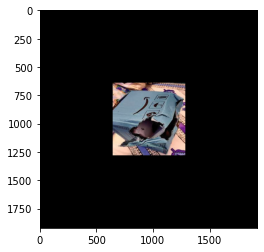

In [13]:
plt.imshow(cv2.imread('/content/resized/images/-13-_jpeg_jpg.rf.9983144f1c5ba321ccc6277166b5a681.jpg'))